# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Plotting-normal-distribution" data-toc-modified-id="Plotting-normal-distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting normal distribution</a></div><div class="lev1 toc-item"><a href="#Fitting-normal-distribution" data-toc-modified-id="Fitting-normal-distribution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fitting normal distribution</a></div><div class="lev1 toc-item"><a href="#Checking-normality-using-Shapiro-test" data-toc-modified-id="Checking-normality-using-Shapiro-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Checking normality using Shapiro test</a></div><div class="lev1 toc-item"><a href="#Checking-Log-normal-distribution" data-toc-modified-id="Checking-Log-normal-distribution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Checking Log-normal distribution</a></div><div class="lev1 toc-item"><a href="#Normal-distribution-from-numpy.random.randn-(n-means-normal)" data-toc-modified-id="Normal-distribution-from-numpy.random.randn-(n-means-normal)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Normal distribution from numpy.random.randn (n means normal)</a></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import scipy
import scipy.stats as stats

%load_ext version_information
%version_information numpy,  scipy, pandas, sklearn, matplotlib, seaborn

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 7.4.0
OS Darwin 14.5.0 x86_64 i386 64bit
numpy 1.11.0
scipy 0.19.0
pandas 0.20.0
sklearn 0.18.1
matplotlib 2.0.0
seaborn 0.7.1
Thu Jun 27 13:29:15 2019 EDT

# Plotting normal distribution

[<matplotlib.text.Text at 0x11588a080>, <matplotlib.text.Text at 0x11586ddd8>]

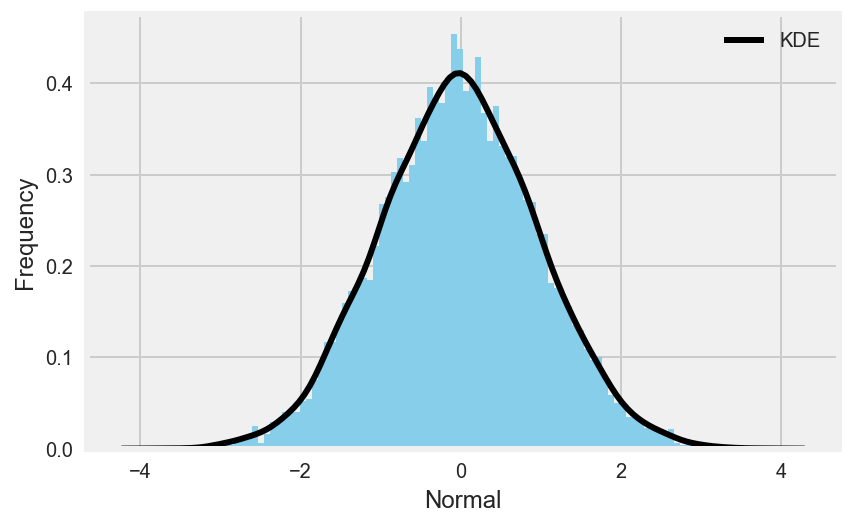

In [2]:
# generate random numbersfrom N(0,1)
data_normal = stats.norm.rvs(size=10000,loc=0,scale=1,random_state=0)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal', ylabel='Frequency')

# Fitting normal distribution

(0.043371967094638579, 0.92350389642599229)


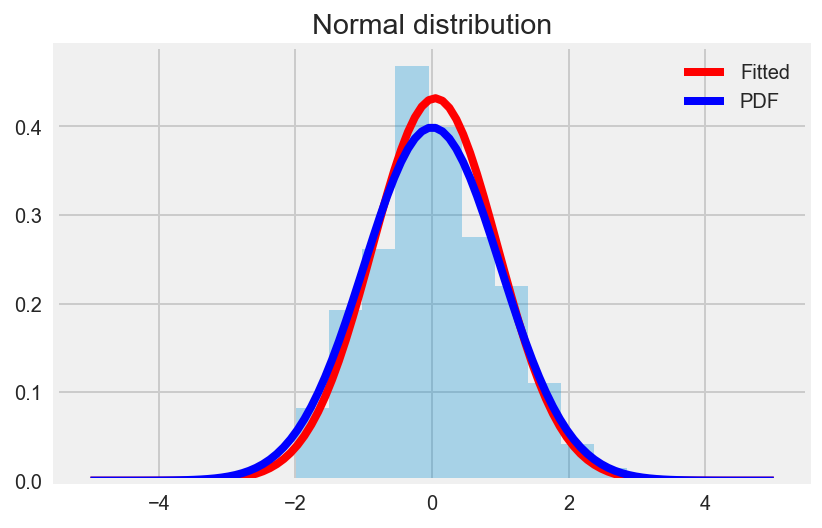

In [3]:
# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
samp = stats.norm.rvs(loc=0,scale=1,size=150) 

params = stats.norm.fit(samp) # distribution fitting
print(params)

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(-5,5,100)

# fitted distribution
pdf_fitted = stats.norm.pdf(x,loc=params[0],scale=params[1])

# original distribution
pdf = stats.norm.pdf(x)

plt.title('Normal distribution')
plt.plot(x,pdf_fitted,'r-',label='Fitted')
plt.plot(x,pdf,'b-',label='PDF')
plt.hist(samp,normed=1,alpha=.3)
plt.legend()
plt.show()

/Users/poudel/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


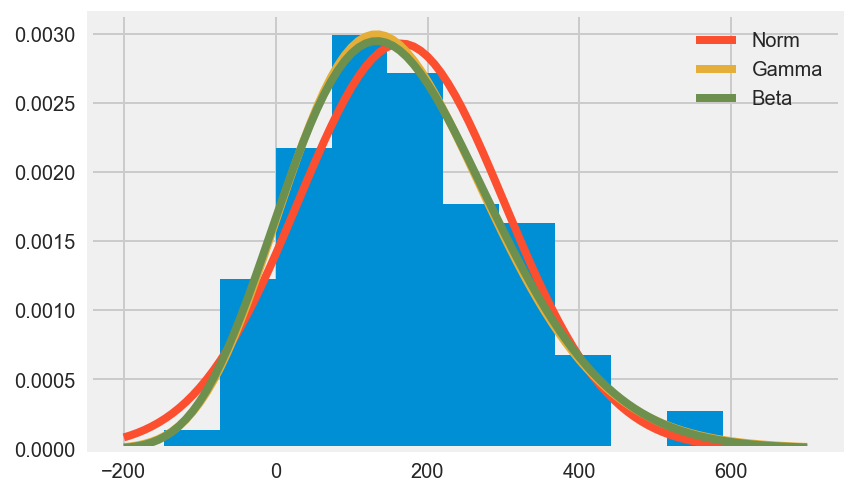

In [4]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt

# create some normal random noisy data
ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
plt.hist(ser, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
m, s = stats.norm.fit(ser) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(ser)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma")

# guess what :) 
ab,bb,cb,db = stats.beta.fit(ser)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")
plt.legend()
plt.show()  

# Checking normality using Shapiro test

In [8]:
# check normal distribution
x = stats.norm.rvs(loc=5, scale=3, size=100,random_state=0)
print(x.mean(), x.std()) # (5.1794240466034553, 3.0236467341497391)

# Shapiro test of normality
statistic, pvalue = stats.shapiro(x)

print("level of significance alpha                    = ", 0.01)
print("p-value for `accepting` normality of x-data = ", pvalue)
print("Conclusion: The array come from normal distribution" if pvalue>0.01
      else "Conclusion: The array isn't normal.")

5.1794240466 3.02364673415
level of significance alpha                    =  0.01
p-value for `accepting` normality of x-data =  0.8689165711402893
Conclusion: The array come from normal distribution


# Checking Log-normal distribution

In [11]:
rv = x # random variate
 

# the data is lognormal if np.log(data) is normal
pvalue = stats.shapiro(np.log(rv))[-1]

print("level of significance alpha                    = ", 0.01)
print("p-value for `accepting` lognormality of x-data = ", pvalue)
print("Conclusion: The array come from lognormal distribution" if pvalue>0.01
      else "Conclusion: The array isn't lognormal.")

level of significance alpha                    =  0.01
p-value for `accepting` lognormality of x-data =  1.0
Conclusion: The array come from lognormal distribution


/Users/poudel/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log


# Normal distribution from numpy.random.randn (n means normal)

In [7]:
x = 2 * np.random.randn(1000) + 7.0 # normally  distributed values
y = np.exp(x) # these values have lognormal distribution since log(y) follows normal distribution.

lognorm_params = stats.lognorm.fit(y, floc=0)

shape, loc, scale = lognorm_params

estimated_mu = np.log(scale)
estimated_sigma = shape

print (estimated_mu)
print (estimated_sigma)

7.05352036446
2.00908392243
